In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


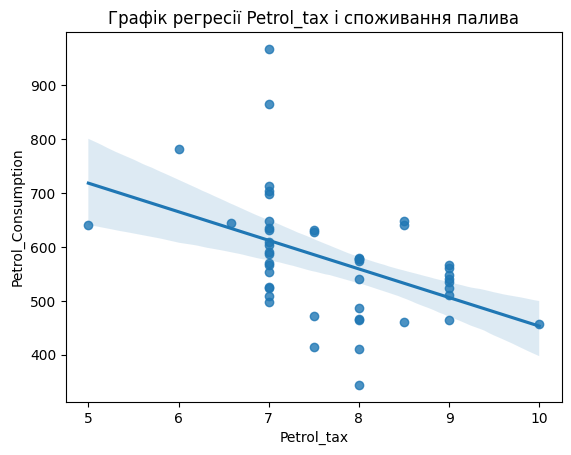

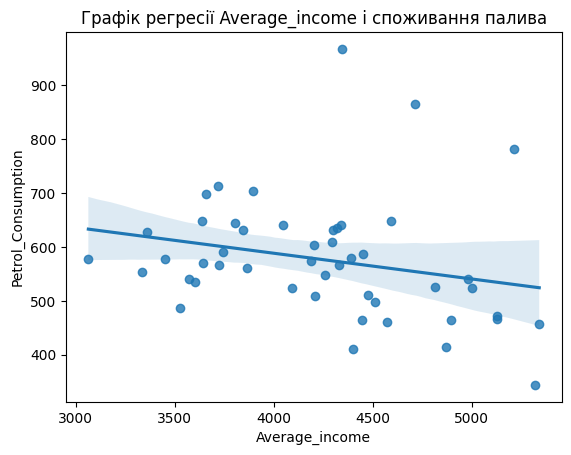

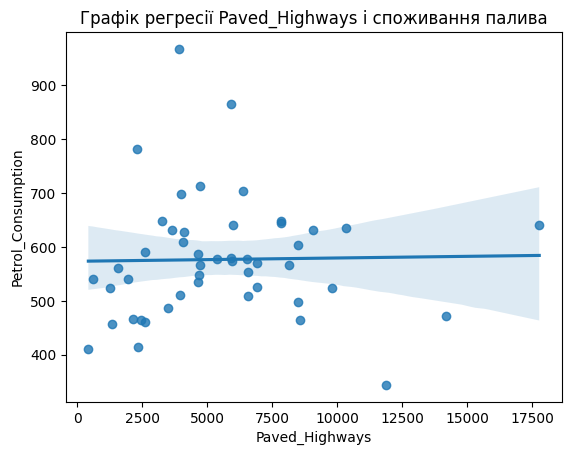

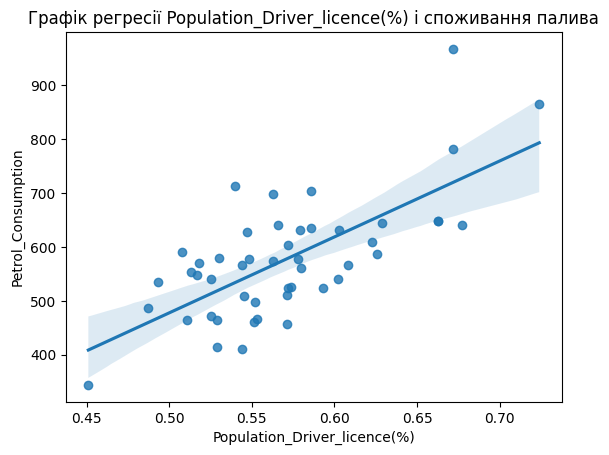

In [4]:
veriables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in veriables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Графік регресії {var} і споживання палива')

In [5]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Кореляція Пірсона')]

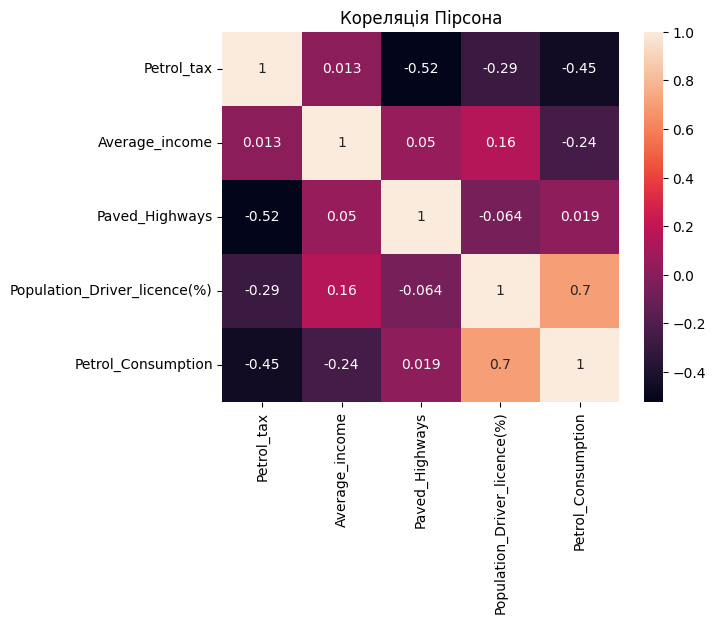

In [15]:
sns.heatmap(corr, annot=True).set(title='Кореляція Пірсона')

## Підготовка моделі

In [10]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
y = df['Petrol_Consumption']
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [12]:
df.shape

(48, 5)

In [13]:
SEED=48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Навчання моделі

In [17]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
print('Intersept: ', regression.intercept_)
print('Coefficients: ', regression.coef_)

Intersept:  344.5859003967307
Coefficients:  [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [31]:
y_pred = regression.predict(X_test)

In [28]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 58.48
MSE: 3983.85
RMSE: 63.12


In [26]:
regression.score(X_train, y_train)

0.689581527862823

In [27]:
regression.score(X_test, y_test)

0.4281868349137846